<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/Informe11_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema del árbol recubridor mínimo**



Entrada: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

Salida: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.


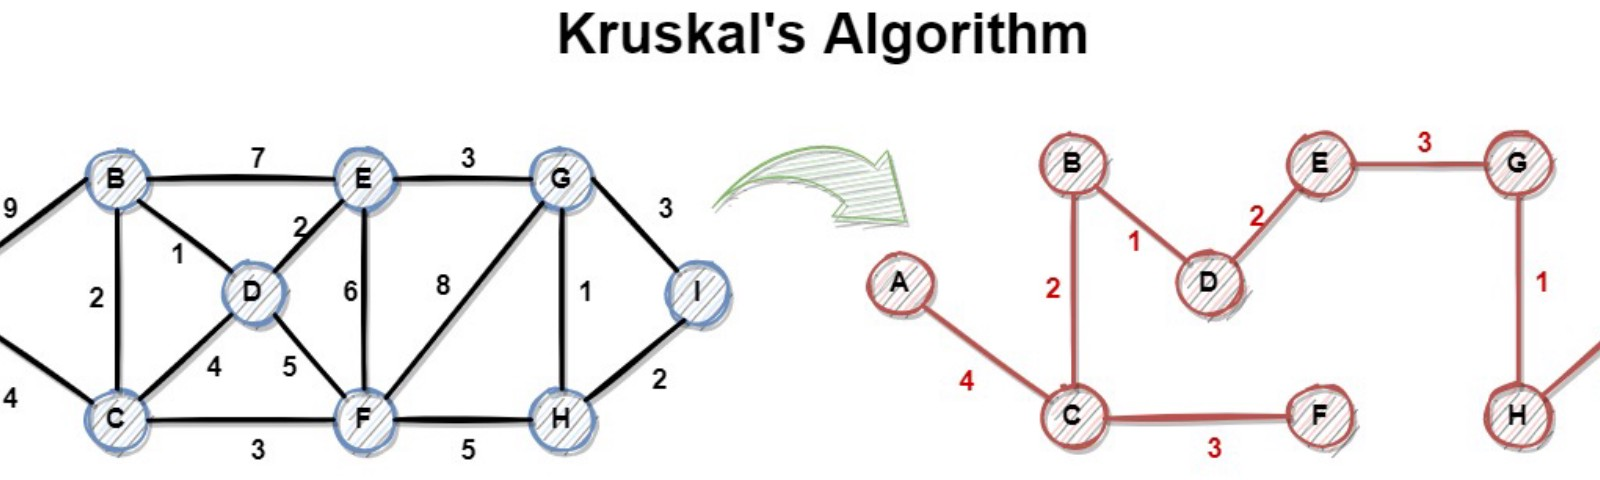

En el siguiente informe se analizará el **problema del árbol recubridor mínimo**, el cual busca la forma de conectar un conjunto de objetos de la forma más económica posible. 

Podemos resolver este problema utilizando el **algoritmo de Kruskal**, el cual se implementa mediante un acercamiento **greedy**. Esto se evidencia en que este algoritmo ocupa el arco con menos peso disponible y que no cause un *loop* en el árbol recubridor mínimo ya en construcción. 



# **2. Código**

El siguiente código muestra una implementación del **algoritmo de Kruskal**.

In [158]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from termcolor import colored

class Grafo:
 
    def __init__(self, vertices):
        self.V = vertices 
        self.grafo = []
 

    # Se utiliza para añadir un arco
    def agregarArco(self, u, v, w):
        self.grafo.append([u, v, w])
 

    # Verifica si dos nodos estan en el mismo árbol
    def find(self, padre, i):
        if (padre[i] != i):
            padre[i] = self.find(padre, padre[i])
        return padre[i]
 

    # Une dos árboles
    def union(self, padre, rank, x, y):
        if (rank[x] < rank[y]):
            padre[x] = y

        elif (rank[x] > rank[y]):
            padre[y] = x
        else:
            padre[y] = x
            rank[x] += 1
 

    def kruskalMST(self, verbose = False, visualize = False):
      # Total de nodos - 1
      n = self.V
      if (verbose == True):
          print("Cantidad de nodos: ", n)

      # Almacena el árbol recubridor mínimo
      mst = [] 

      # Cantidad de arcos almacenados
      e = 0
      
      if (verbose == True):
        print("Grafo de entrada:\n")
        for u, v, w in (self.grafo):
          print(f"(n({colored(u, 'blue')}), n({colored(v, 'yellow')}), peso({colored(w, 'red')}))", end = ",")
        print("\n")

      # Se ordena el grafo a partir del peso
      if (verbose == True):
        print("Ordenando el grafo según el peso de los arcos...")
      self.grafo = sorted(self.grafo, key=lambda item: item[2])
      
      if (verbose == True):
        print("Grafo ordenado obtenido:\n")
        for u, v, w in (self.grafo):
          print(f"(n({colored(u, 'blue')}), n({colored(v, 'yellow')}), peso({colored(w, 'red')}))", end = " ")
        print()

      # Se utiliza para recorrer el grafo ordenado
      i = 0
      p = [] #padre
      r = [] #profundidad

      # Utilizado para el visualize.
      G = nx.Graph()

      # Se crean v subárboles
      for node in range(n):
        p.append(node)
        r.append(0)

      # Itera hasta almacenar n-1 arcos
      while e < n - 1:

        # Se selecciona el menor arco y se aumenta el indice
        u, v, w = self.grafo[i]
        i = i + 1

        x = self.find(p, u)
        y = self.find(p, v)

        if (verbose == True):
          print(f"El padre de {colored(u, 'cyan')} es {colored(x, 'cyan')}")
          print(f"El padre de {colored(v, 'magenta')} es {colored(y, 'magenta')}")

        # Si no son del mismo árbol no generan loops
        if x != y:
          if (verbose == True):
            print(f"El padre de {colored(x, 'green')} es distinto al padre de {colored(y, 'green')}, por lo que se agrega al MST.\n")
          e = e + 1
          mst.append([u, v, w])
          self.union(p, r, x, y)
        elif (verbose == True):
            print(f"El padre de {colored(x, 'red')} es igual al padre de {colored(y, 'red')}, por lo que se descarta.\n")

      #Suma de todos los pesos de los arcos del MST, se inicializa en 0
      min = 0
      # Se obtiene el peso mínimo
      for u, v, peso in mst:
          min += peso

          if(visualize == True):
            G.add_node(u)
            G.add_node(v)
            G.add_edge(u, v, weight = peso)
      
      if (visualize == True):
        fig, ax = plt.subplots()
        ax.set_facecolor('white')
        pos = graphviz_layout (G, prog = "twopi")

        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx(G, pos)
        nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

      if (verbose == True):
        print("\nMST encontrado:", mst)
        print(f"Suma mínima de los pesos encontrada: {colored(min, 'green')}")  

      return mst, min


#Ejemplo
g = Grafo(4)
g.agregarArco(0, 1, 10)
g.agregarArco(0, 2, 6)
g.agregarArco(0, 3, 5)
g.agregarArco(1, 3, 15)
g.agregarArco(2, 3, 4)

mst, min = g.kruskalMST()
print("MST encontrado:", mst)
print("Costo mínimo encontrado: ", min)

MST encontrado: [[2, 3, 4], [0, 3, 5], [0, 1, 10]]
Costo mínimo encontrado:  19


## 2.2. Descripción del algoritmo

**Pasos que sigue el algoritmo:**

1.   Se ordenan todos los arcos dependiendo de su peso de forma ascendente, es decir que vaya de menor a mayor peso. 
2.   Se elige el arco con menor peso.
3.   Vemos si el nuevo arco crea un bucle en el árbol recubridor mínimo que ya estabamos construyendo. Si no crea un loop se agrega al $MST$, si lo hace se descarta. 
4.   Se repite este proceso hasta tener $V-1$ arcos, siendo $V$ la cantidad de vértices del grafo. 
5. Retornamos el $MST$.



## 2.3. Ejemplo


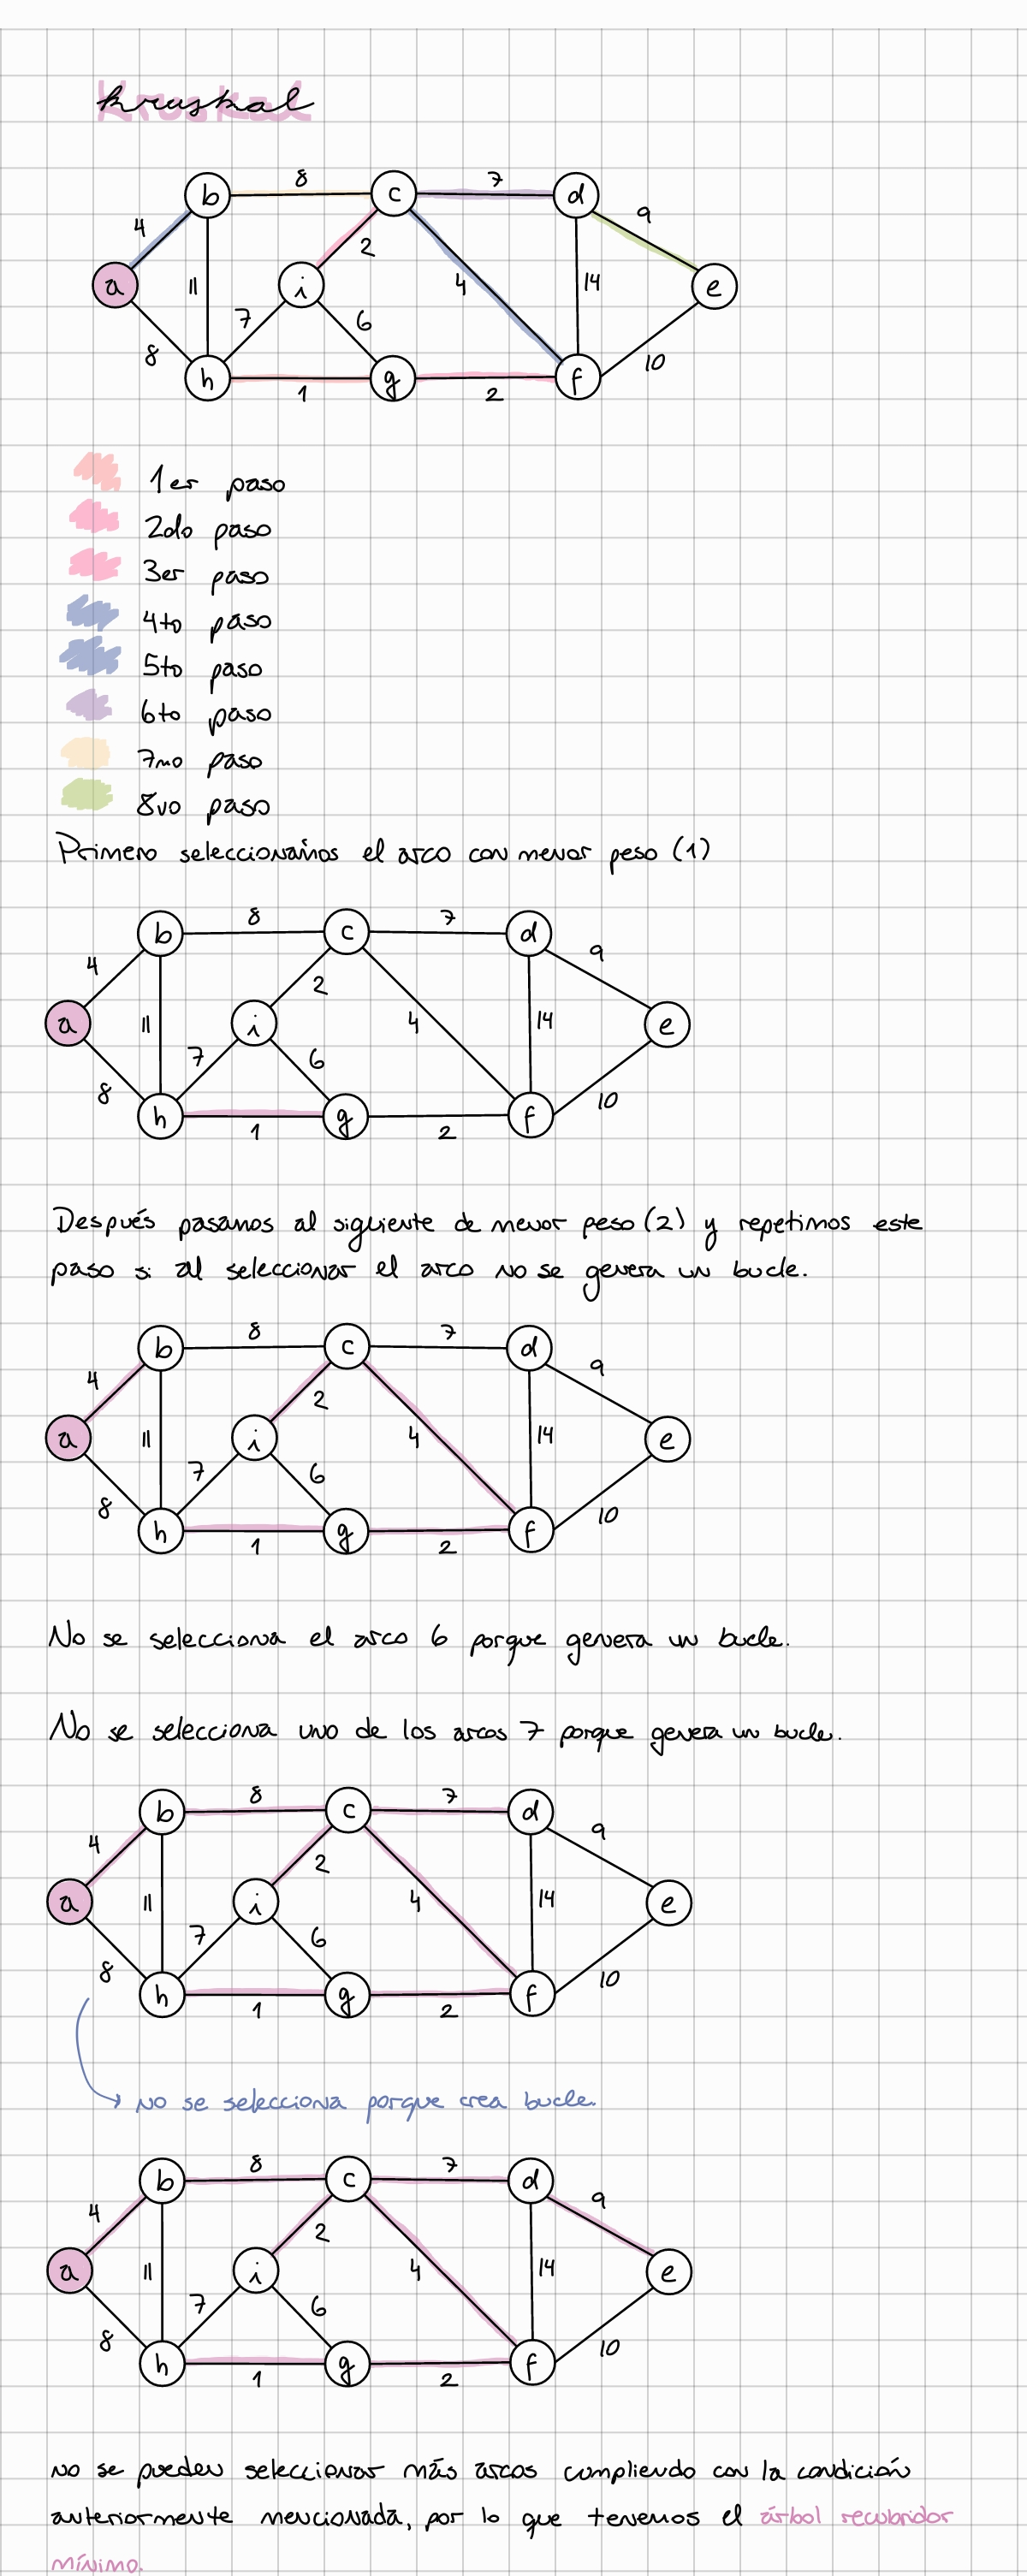

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$ y visualize

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### Generador de instancias:

In [159]:
import random

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  grafo = Grafo(V)
  grafoP = GrafoP(V)
  for i in range(V):
    for j in range(i+1, V):
      n = random.randint(1, 500)
      grafo.agregarArco(i, j, n)
      grafoP.add(i, j, n) 
  return grafo, grafoP

### MST

Cantidad de nodos:  9
Grafo de entrada:

(n(0), n(1), peso(450)),(n(0), n(2), peso(193)),(n(0), n(3), peso(133)),(n(0), n(4), peso(356)),(n(0), n(5), peso(29)),(n(0), n(6), peso(287)),(n(0), n(7), peso(45)),(n(0), n(8), peso(394)),(n(1), n(2), peso(129)),(n(1), n(3), peso(295)),(n(1), n(4), peso(55)),(n(1), n(5), peso(108)),(n(1), n(6), peso(83)),(n(1), n(7), peso(89)),(n(1), n(8), peso(329)),(n(2), n(3), peso(473)),(n(2), n(4), peso(143)),(n(2), n(5), peso(351)),(n(2), n(6), peso(89)),(n(2), n(7), peso(500)),(n(2), n(8), peso(61)),(n(3), n(4), peso(173)),(n(3), n(5), peso(269)),(n(3), n(6), peso(275)),(n(3), n(7), peso(443)),(n(3), n(8), peso(325)),(n(4), n(5), peso(202)),(n(4), n(6), peso(431)),(n(4), n(7), peso(193)),(n(4), n(8), peso(226)),(n(5), n(6), peso(464)),(n(5), n(7), peso(234)),(n(5), n(8), peso(454)),(n(6), n(7), peso(495)),(n(6), n(8), peso(281)),(n(7), n(8), peso(13)),

Ordenando el grafo según el peso de los arcos...
Grafo ordenado obtenido:

(n(7), n(8), peso(13)) (n(

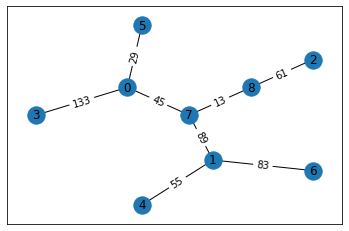

In [175]:
g, a = graph_instance_creator(9)

mst, m = g.kruskalMST(verbose = True, visualize = True)

#**3. Tiempo de ejecución**

Teorema: El algoritmo de kruskal posee un tiempo de ejecución de $O(e \cdot log(e))$ en todos los casos.

Para poder explicar el tiempo de ejecución del algoritmo de kruskal hay que explicar el tiempo de ejecución de la función union-find

* $O(log(E))$ al máximo para la primera iteración 
* $O(log(E))$ al máximo para la segunda iteración 
* Esto se repite un total de V-1 veces, lo cual es equivalente a E

Por lo que nos queda$ T(n) = O(e \cdot log(e) + V + e \cdot log(e) + e \cdot log(e))$

Lo cual equivale a un tiempo de ejecución de $O(e \cdot log(e))$

* Ordenar los edges toma un total de $O(e \cdot log(e))$ -> mergeSort
* La función union find toma un total de $O(e \cdot log(e))$
* La función make_set toma un tiempo máximo de $O(v)$, si crea un subconjunto de todos los vértices.

Por lo que el tiempo de ejecución para el algoritmo de kruskal es $O(e \cdot log(e))$



# **4. Correctitud**

**Teoría**: Para cualquier grafo conectado $G=(V,E)$, y costos reales para sus arcos, el algoritmo de Kruskal retorna un árbol recubridor mínimo de $G$.

**Prueba**:

Primero, $T$ es un árbol recubridor. Esto es porque:


*   $T$ es un **bosque**. Nunca se crean ciclos. 
*   $T$ es **recubridor**. Supongamos que hay un vértice $v$ que no es incidente con los arcos de $T$. Entonces los arcos incidentes de $v$ tienen que haber sido considerados en el algoritmo en algún punto. El primer arco (del orden de arcos) habría sido incluído porque no puede haber creado un ciclo, lo que contradice la definición de $T$.
*   $T$ está **conectado**. Supongamos que $T$ no está conectado. Entonces $T$ tiene dos o más componentes conectados. Ya que $G$ está conectado, entonces estos componentes tienen que haber sido conectados por algunos arcos en $G$, no en $T$. El primero de estos arcos (del orden de arcos) habría sido incluído en $T$ porque no podría haber creador un ciclo, lo que contradice la definición de $T$. 

En segundo lugar, $T$ es un árbol recubridor mínimo. Vamos a comprobar esto ocupando **inducción**. Supongamos que $T$ es un árbol recubridor mínimo. Si $T = T*$, entonces $T$ es un árbol recubridor mínimo. Si $T \neq T*$, entonces existe un arco $e ∈ T*$ de *peso mínimo* que no está en $T$. Además, $T \cup e$ contiene un ciclo $C$ de modo que:


*   Cada arco en $C$ tiene un peso menor que $wt (e)$ (Esto sigue desde cómo el algoritmo construyó $T$). 
*   Hay algún arco $f$ en $C$ que no está en $T*$ (Porque $T*$ no tiene el ciclo $C$).

Considere el árbol $T_2 = T$ \ ${e} ∪ {f}$:



*   $T_2$ es un árbol recubridor.
*   $T_2$ tiene más arcos en común con $T*$ que con $T$. 
*   Y $wt(T_2)$ > $wt(T)$ (Intercambiamos un arco con otro que no sea más caro).

Podemos rehacer el mismo proceso con $T_2$ para encontrar un árbol recubridor $T_3$ con más arcos en común con $T*$. Por inducción, podemos continuar este proceso hasta que alcancemos $T*$, de lo que vemos:

$wt(T) <= wt(T_2) <= wt(T_3) <= ... <= wt(T*)$.

Ya que $T*$ es un árbol recubridor mínimo, entonces estas desigualdades deben ser igualdades y concluímos que $T$ es un árbol recubridor mínimo. 










# **5. Experimentos.**

## **5.1 Tiempo de ejecución respecto al aumento de la cantidad de nodos**

En el siguiente gráfico se compara el tiempo de ejecución del **algoritmo de Kruskal** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

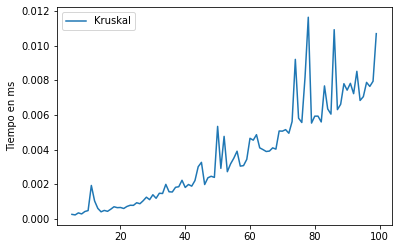

In [161]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
for n in range(5, 100):
  G, g = graph_instance_creator(n)

  t1 = repeat(setup="from __main__ import Grafo", stmt = lambda: G.kruskalMST(), number = 10, repeat = 1)
  x.append(n)
  y.append(t1)


plt.plot(x, y)
plt.legend(["Kruskal"])

plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede deducir del gráfico el tiempo de ejecución del algoritmo de kruskal aumenta de forma logaritmica a medida que se aumenta la cantidad de arcos, donde se ve una curva leve si la cantidad de nodos es alrededor de $30$, pero que después de esa cantidad empiezan a generarse *peaks* de forma frecuente. 

Además, podemos decir que este algoritmo soluciona el problema de forma eficaz, ya que su tiempo de ejecución alcanza como máximo los $0.012 mms$. Esto se debe a que es un algoritmo del tipo **greedy**, los cuales se centran en entregar un resultado en un tiempo pequeño. 

## **5.2. Algoritmo de Prim v/s Algoritmo de Kruskal**

En el siguiente grafico se observa una comparación del **algoritmo de Prim** con el **algoritmo de Kruskal** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

In [171]:
import sys  # Library for INT_MAX
 
 
class GrafoP():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def add(self, a, b, c):
      self.graph[a][b] = c
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        # Initialize min value
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

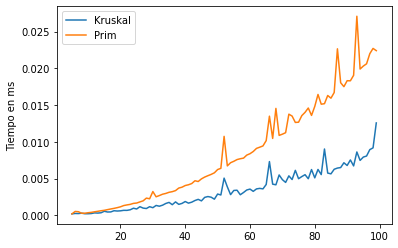

In [173]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]; y1=[]
for n in range(5, 100):
  G, GP = graph_instance_creator(n)

  t1 = repeat(setup="from __main__ import Grafo", stmt = lambda: G.kruskalMST(), number = 10, repeat = 1)
  t2 = repeat(setup="from __main__ import GrafoP", stmt = lambda: GP.primMST(), number = 10, repeat = 1)
  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Kruskal", "Prim"])

plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar en el gráfico, el algoritmo de *kruskal* es más eficiente que el algoritmo *prim*. Esto es esperable debido a sus tiempos de ejecución, donde *kruskal* tiene tiempo $O(E \log (V))$ y po otro lado *prim*  tiene tiempo$O(v^2)$, el cual es mucho mayor. 
De esta misma idea se puede desplegar el hecho que el gráfico está correcto, ya que *kruskal* tiene una curva logarítmica y *prim* una cradrática. 

Además, se ve que existen leves *peaks* en los mismos puntos en ambos algoritmos, lo que puede ser causado por el procesador. 

